In [ ]:
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

MPAM Generator

The constelation of reference is:  [-3. -1.  1.  3.]


<ipython-input-2-5b1b36df74ef>:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy(SNRdB, pe, 'mx-', label='Simulated SER for ' + str(M) + 'PAM')


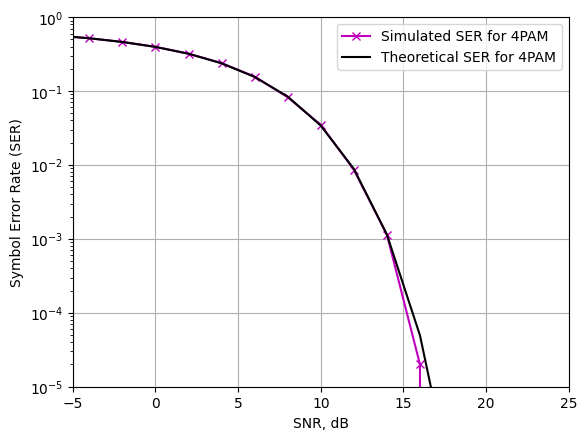

In [2]:
# Modulation order
M = 4

# Number of transmitted symbols
N = 100000

# References's constelation
x_ref = np.array([])
y_ref = np.array([])

# For each symbol
for i in range(M):
  l = 2*i-M+1 # Its amplitude is defined by this formation law
  x_ref = np.append(x_ref,l) # This line and the following exist for plotting the reference constellation
  y_ref = np.append(y_ref,0)

print("The constelation of reference is: ", x_ref)
plt.scatter(x_ref,y_ref)

E = np.sum(pow(np.abs(x_ref),2))/M # Average enery per symbol in the constellation
SNRdB = np.arange(-10,20,2) # SNR values from -10 to 20dB with step equal to 2
SNR = pow(10,SNRdB/10) # Linear scale of SNR

x = np.array([]) # Array which will be composed by the transmitted symbols
y = np.array([]) # Array which will be composed by the received symbols

x_ref = x_ref/np.sqrt(E) # Reference constellation with normalized energy
sigma = np.sqrt(1/(2*SNR)) # Standard deviation of the Gaussian noise

d = np.zeros(M) # Array associated to the distanced between each received symbol and the i-th reference symbol (with i = 1,2,...,M). Initialized with zeros.
y_hat = np.zeros(N) # N estimated symbols
pe = np.zeros(len(SNRdB)) # Vector which contains the values of SER for each SNR value in dB
count_sym_err = np.zeros(len(SNRdB)) # Amount of errors for each SNR value in dB

for k in range(len(SNRdB)): # For each value of SNR in dB
  x = np.repeat(x_ref,N/M) # The transmitted signal will be eachone of the M values of the reference constellation repeated N/M times, culminating in a vector of M*(N/M) = N elements
  np.random.shuffle(x) # It makes the x vector random

  #v = np.random.uniform(0,4,1)
  v = np.random.normal(0,sigma[k],N) # It generates the Gaussian noise with mean equal to zero and standard deviation associated to the respective SNR (sigma[k])

  y = x + v # The received signal is the transmitted one added to the noise

  for kk in range(N): # For each one out of N received symbol
    for kkk in range(M): # For each reference symbol (which composes the reference constellation)
      d[kkk] = np.linalg.norm(y[kk]-x_ref[kkk]) # It calculates the Euclidean distance between the received symbol and each one of the reference symbol
    index_min = np.argmin(d) # Which index refers to the minimum value present in the Euclidean distance vector? This line returns that!
    y_hat[kk] = x_ref[index_min] # The estimated symbol is the reference symbol which keeps the minimum Euclidean distance to the respective received symbol
    if y_hat[kk] != x[kk]: # If the estimated symbol is different from the transmitted one
     count_sym_err[k] = count_sym_err[k] + 1 # The error is increased by one

  pe[k] = count_sym_err[k]/N # The SER for the respective SNR is given by the ratio between the total of errors and the total of transmitted symbols
  #print(pe[k])

pe_t = ((2 * (M - 1)) / M) * (1 / 2) * special.erfc(np.sqrt(((6 * SNR) / ((M ** 2) - 1)) / (2))) # Theoretical expression for MPAM SER
plt.semilogy(SNRdB, pe, 'mx-', label='Simulated SER for ' + str(M) + 'PAM')
plt.semilogy(SNRdB, pe_t, 'k-', label='Theoretical SER for ' + str(M) + 'PAM')
plt.legend()
plt.xlabel('SNR, dB')
plt.ylabel('Symbol Error Rate (SER)')
plt.grid(True)
plt.axis([-5, 25, 10 ** (-5), 1])
plt.show()